In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [5]:
# Handle missing values
df.replace('?', np.nan, inplace=True)
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20096\3209829740.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)


In [6]:
# Convert 'price' to numeric and drop rows with missing prices
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)

In [7]:
# Convert other numeric columns and fill missing values with mean
numeric_columns = ['bore', 'stroke', 'horsepower', 'peak-rpm']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20096\4289137737.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [8]:
# Drop irrelevant columns
df.drop(['symboling', 'make', 'fuel-system', 'engine-location'], axis=1, inplace=True)

In [9]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Feature Engineering: Create horsepower to curb weight ratio
df['hp_to_weight_ratio'] = df['horsepower'] / df['curb-weight']

In [11]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [12]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

In [14]:
# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 13341261.43902439
R² Score: 0.883911753705844


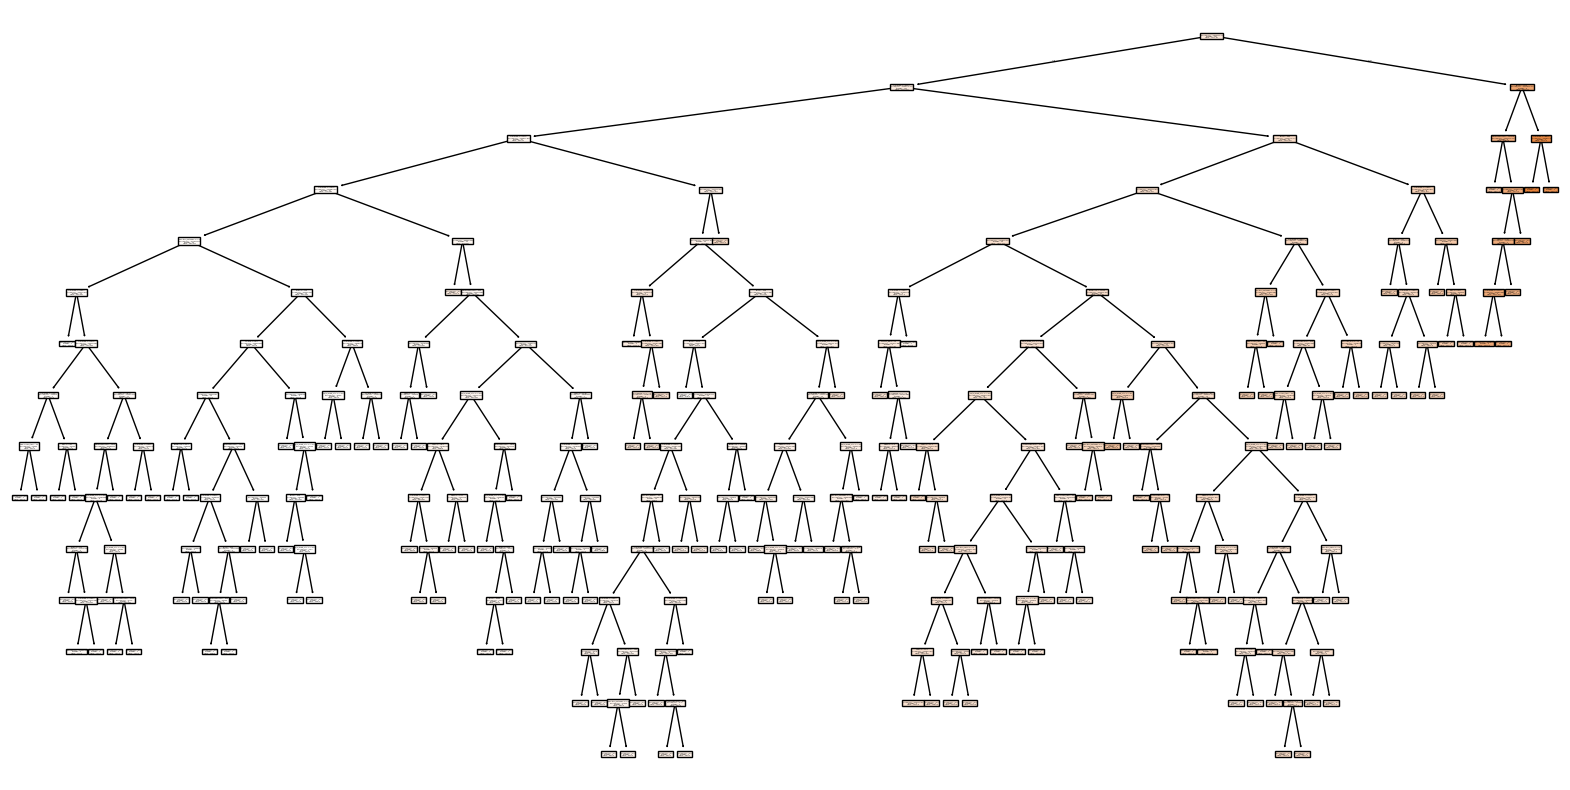

In [18]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

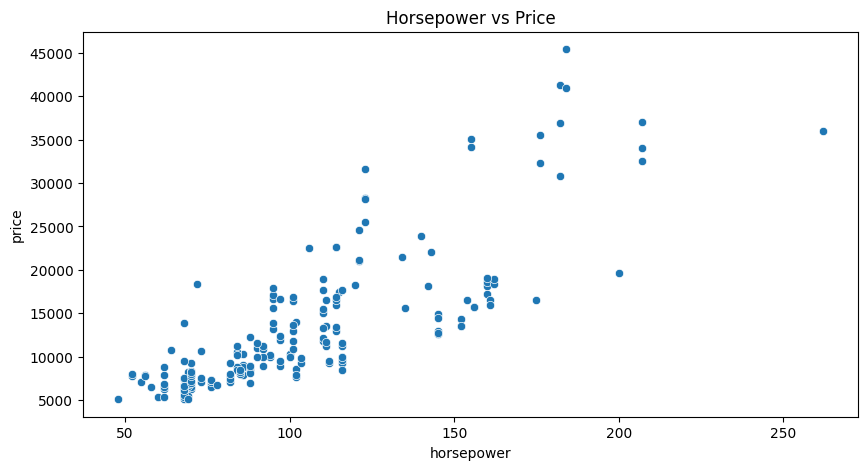

In [19]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title('Horsepower vs Price')
plt.show()

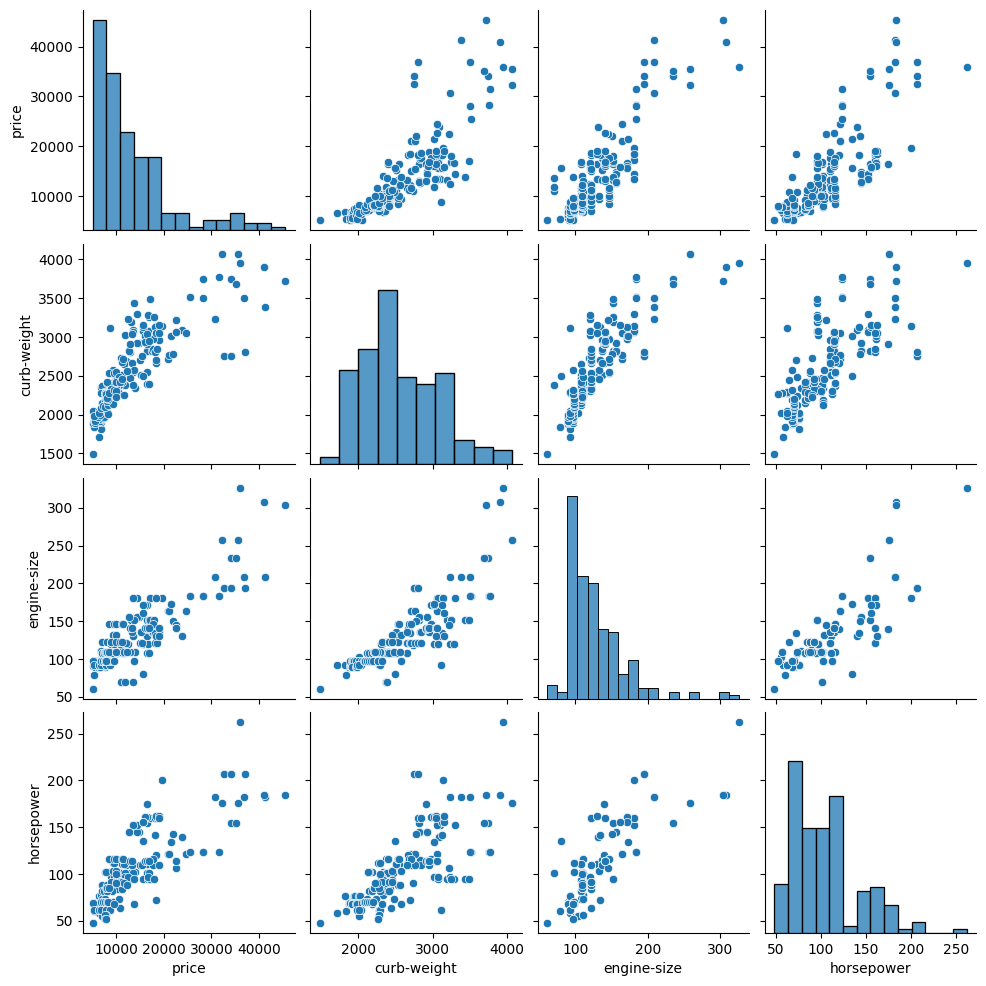

In [20]:
# Pairplot to see relationships between numerical features
sns.pairplot(df[['price', 'curb-weight', 'engine-size', 'horsepower']])
plt.show()